In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt


In [7]:
iris= load_iris()

In [10]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(300, input_shape=(4,), activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(3, activation="softmax")
])


In [20]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])


/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 1.1660 - accuracy: 0.3619
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7322 - accuracy: 0.6286
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.6762
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7238
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.7048
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8190
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8381
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.9143
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8476
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.8857
Epoch 11/

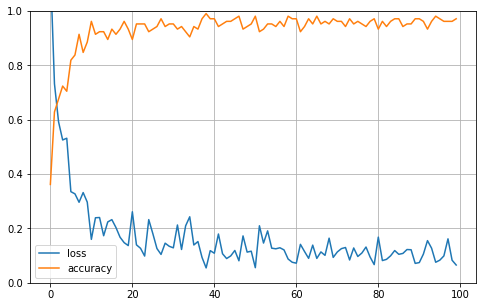

In [23]:
history = model.fit(X_train, y_train, batch_size=5, epochs=100)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [27]:
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


2/2 [==============================] - 0s 5ms/step - loss: 0.0388 - accuracy: 0.9778
Final test set loss: 0.038800
Final test set accuracy: 0.977778


In [31]:
class_names = iris.target_names

X_new = X_test[:5]

# Predict the classes for the new samples
y_pred = np.argmax(model.predict(X_new), axis=1)
print(np.array(class_names)[y_pred])

y_new = y_test[:5]
print(np.array(class_names)[y_new])


['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
